In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
inp_dir=r"C:\Users\Ash kan\Documents\watbalpy\waterball_test\modelito_for_paper_tests\v5_modelito_change_zone_5_6_soil_charc\all_regions_and_Total_report.csv"
df=pd.read_csv(inp_dir)

In [3]:
#yearly precipitation
area_pixels_total=135900
df_feats_prec=["Time","REG_1_Prec","REG_2_Prec","REG_3_Prec","REG_4_Prec","REG_5_Prec","REG_6_Prec"]
df_prec=df[df_feats_prec]
df_prec["Time"]=pd.to_datetime(df_prec["Time"])
df_prec.index=df_prec["Time"]
df_prec_yearly=df_prec.resample("1Y").sum()
df_prec_yearly


c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,REG_1_Prec,REG_2_Prec,REG_3_Prec,REG_4_Prec,REG_5_Prec,REG_6_Prec
Time,,,,,,
2018-12-31,1042.288538,1296.654660,1341.598401,1058.504929,918.201678,1252.121550
2019-12-31,564.186340,624.825453,633.125534,573.935801,496.030344,664.873605
2020-12-31,936.127818,1471.570413,1452.801792,1237.529622,743.692096,1207.713981
2021-12-31,423.159713,634.570897,608.033975,436.892590,335.443106,438.515825


In [4]:
#yearly recharge

df_feats_rec=["Time","REG_1_Rec","REG_2_Rec","REG_3_Rec","REG_4_Rec","REG_5_Rec","REG_6_Rec"]
df_rec=df[df_feats_rec]
df_rec["Time"]=pd.to_datetime(df_rec["Time"])
df_rec.index=df_rec["Time"]
df_rec_yearly=df_rec.resample("1Y").sum()
df_rec_yearly

c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,REG_1_Rec,REG_2_Rec,REG_3_Rec,REG_4_Rec,REG_5_Rec,REG_6_Rec
Time,,,,,,
2018-12-31,64.588102,793.169076,425.405133,92.520957,4.614975,17.558043
2019-12-31,6.289575,598.108795,198.818875,28.813595,0.000000,0.000000
2020-12-31,37.522238,841.382642,432.527768,141.525265,0.855535,19.487894
2021-12-31,0.704579,602.253413,154.854721,4.425444,0.000000,0.000000


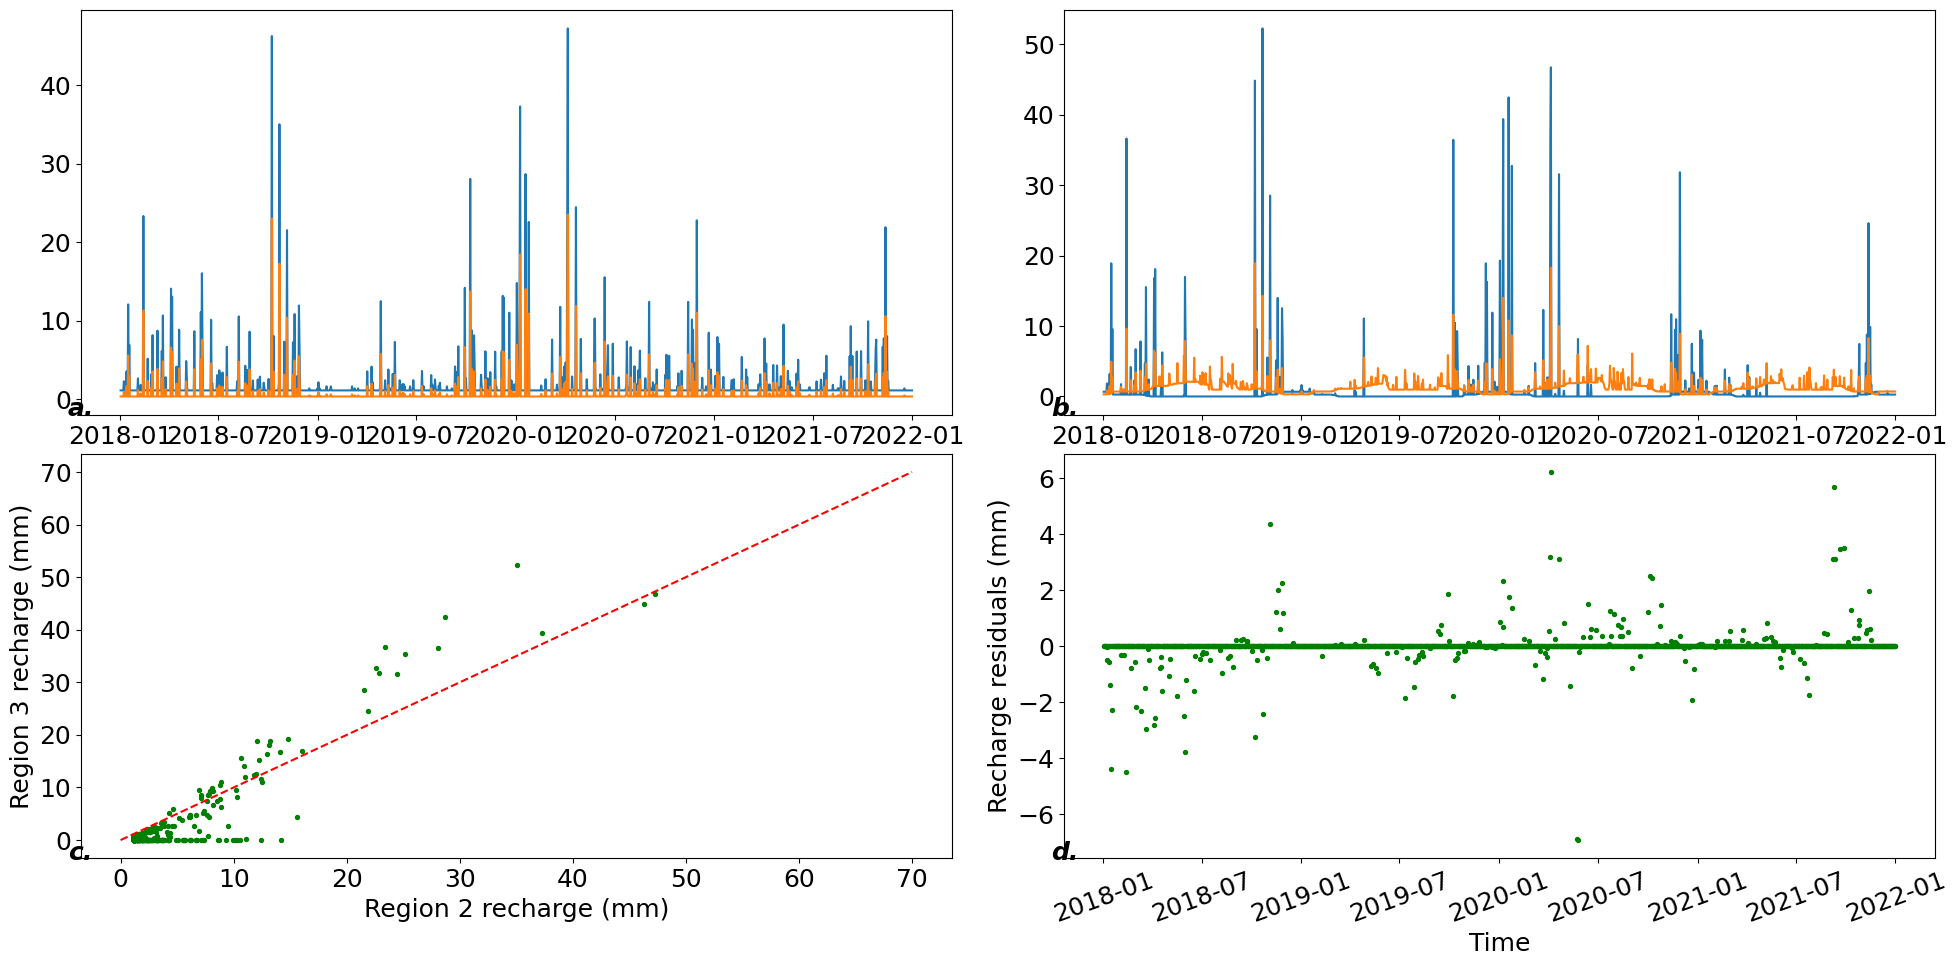

In [10]:
#df_feats_rec.remove("Time")
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots()

df_urb_rec=["2","3"]
left, width = -0.015, .5
bottom, height = -0.015, .5
for n,i in enumerate(df_urb_rec):
    #ax = plt.gca()
    #plt.subplot(1,2, n+1).plot(df_prec["Time"],df_prec["REG_"+i+"_Prec"],label="P")
    df.loc[df["REG_"+i+"_Runoff"] <0, "REG_"+i+"_Runoff"] = 0
        
    
    plt.subplot(2,2, n+1).plot(df_rec["Time"],df_rec["REG_"+i+"_Rec"],label="R")

    plt.subplot(2,2, n+1).plot(df_rec["Time"],df["REG_"+i+"_ETR"],label="Ep")

    #plt.subplot(2,2, n+1).legend(loc='center left')

    ax2 = plt.subplot(2,2, n+1).twinx()
    ax2.plot(df_rec["Time"],df["REG_"+i+"_Runoff"],label="Q")
    #ax2.set_ylim(0,200)
    #ax2.invert_yaxis()
    
    #plt.legend()
    #plt.subplot(2,2, n+1).set_title("Region "+i)
    #plt.subplot(2,2, n+1).set_xlabel("Time")
    #plt.subplot(2,2, n+1).set_ylabel("mm")
    #plt.ylim(0,170)
    #xticks = pd.date_range(min(df_prec["Time"]), max(df_prec["Time"])+pd.Timedelta(1, "d"), freq='3M')
    #ax.set_xticklabels([x.strftime('%Y-%m') for x in xticks])
    plt.xticks(rotation=20)
    #ax.set_ylim([1,1.2])
    #plt.subplot(2,2, n+1).xaxis.set_major_locator(mdates.YearLocator())
    #plt.subplot(2,2, n+1).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #plt.subplot(1,2, n+1).gcf().autofmt_xdate()
    g="b."
    if n==0: g="a."
    plt.subplot(2,2, n+1).text(left, bottom, g,
        horizontalalignment='left',
        verticalalignment='bottom',transform=plt.subplot(2,2, n+1).transAxes,style='italic', weight='bold')



#############################################################
plt.subplot(2,2, 3).scatter(df_rec["REG_2_Rec"],df_rec["REG_3_Rec"],color="green",s=8)
plt.subplot(2,2, 3).plot(np.arange(71),linestyle='dashed',color="red")
plt.subplot(2,2, 3).set_xlabel("Region 2 recharge (mm)")
plt.subplot(2,2, 3).set_ylabel("Region 3 recharge (mm)")

plt.subplot(2,2, 3).text(left, bottom, 'c.',
        horizontalalignment='left',
        verticalalignment='bottom',transform=plt.subplot(2,2, 3).transAxes,style='italic', weight='bold')
#############################################################
plt.subplot(2,2, 4).scatter(df_prec["Time"],df_prec["REG_2_Prec"]-df_prec["REG_3_Prec"],s=8,color="green")
plt.subplot(2,2, 4).set_xlabel("Time")
plt.subplot(2,2, 4).set_ylabel("Recharge residuals (mm)")
plt.xticks(rotation=20)
plt.subplot(2,2, 4).text(left, bottom, 'd.',
        horizontalalignment='left',
        verticalalignment='bottom',transform=plt.subplot(2,2, 4).transAxes,style='italic', weight='bold')
#font = {'family':'Verdana','size': 8}
#plt.rc('font', **font)  

font = {'size'   : 18}

plt.rc('font', **font)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout(h_pad=0.2,w_pad=0.5)

plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","2_.png"),dpi=600)


      
plt.show()
#df_rec[df_urb_rec].plot(kind="line")

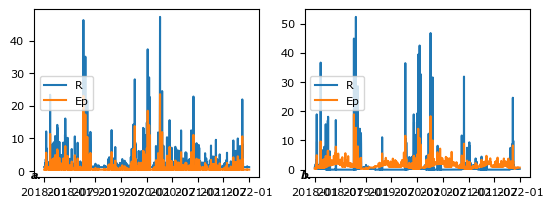

In [20]:
#df_feats_rec.remove("Time")
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots()

df_urb_rec=["2","3"]
left, width = -0.015, .5
bottom, height = -0.015, .5
for n,i in enumerate(df_urb_rec):
    #ax = plt.gca()
    #plt.subplot(1,2, n+1).plot(df_prec["Time"],df_prec["REG_"+i+"_Prec"],label="P")
    df.loc[df["REG_"+i+"_Runoff"] <0, "REG_"+i+"_Runoff"] = 0
        
    
    plt.subplot(2,2, n+1).plot(df_rec["Time"],df_rec["REG_"+i+"_Rec"],label="R")

    plt.subplot(2,2, n+1).plot(df_rec["Time"],df["REG_"+i+"_ETR"],label="Ep")

    plt.subplot(2,2, n+1).legend(loc='center left')

    ax2 = plt.subplot(2,2, n+1).twinx()
    ax2.plot(df_rec["Time"],df["REG_"+i+"_Runoff"],label="Q")
    #ax2.set_ylim(0,200)
    ax2.invert_yaxis()
    
    #plt.legend()
    #plt.subplot(2,2, n+1).set_title("Region "+i)
    #plt.subplot(2,2, n+1).set_xlabel("Time")
    #plt.subplot(2,2, n+1).set_ylabel("mm")
    #plt.ylim(0,170)
    #xticks = pd.date_range(min(df_prec["Time"]), max(df_prec["Time"])+pd.Timedelta(1, "d"), freq='3M')
    #ax.set_xticklabels([x.strftime('%Y-%m') for x in xticks])
    plt.xticks(rotation=20)
    #ax.set_ylim([1,1.2])
    #plt.subplot(2,2, n+1).xaxis.set_major_locator(mdates.YearLocator())
    #plt.subplot(2,2, n+1).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #plt.subplot(1,2, n+1).gcf().autofmt_xdate()
    g="b."
    if n==0: g="a."
    plt.subplot(2,2, n+1).text(left, bottom, g,
        horizontalalignment='left',
        verticalalignment='bottom',transform=plt.subplot(2,2, n+1).transAxes,style='italic', weight='bold')




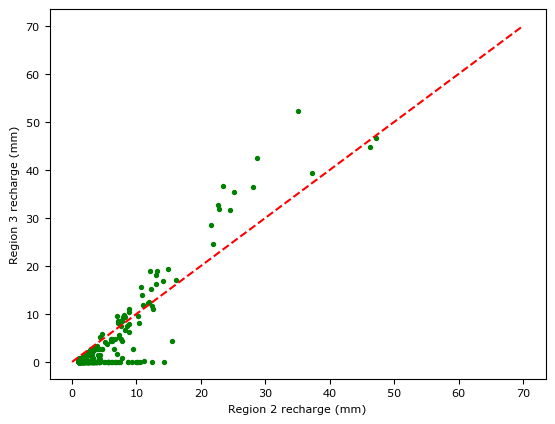

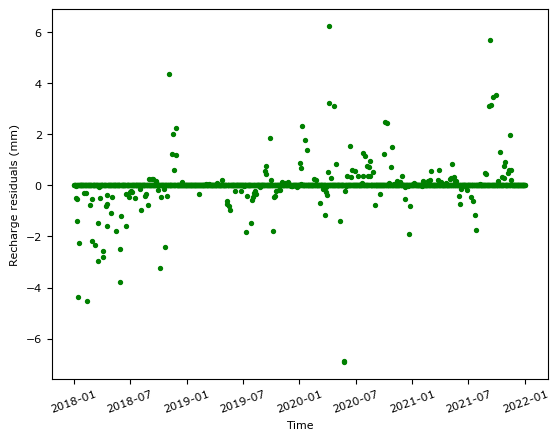

0.12981879758042436

In [29]:

ax = plt.gca()
plt.scatter(df_rec["REG_2_Rec"],df_rec["REG_3_Rec"],color="green",s=8)
plt.plot(np.arange(71),linestyle='dashed',color="red")
ax.set_xlabel("Region 2 recharge (mm)")
ax.set_ylabel("Region 3 recharge (mm)")
font = {'family':'Verdana','size': 8}
plt.rc('font', **font)    
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","urban_line.png"),dpi=600)
plt.show()

plt.close()
ax = plt.gca()

plt.scatter(df_prec["Time"],df_prec["REG_2_Prec"]-df_prec["REG_3_Prec"],s=8,color="green")
ax.set_xlabel("Time")
ax.set_ylabel("Recharge residuals (mm)")
font = {'family':'Verdana','size': 8}
plt.rc('font', **font)    
plt.xticks(rotation=20)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","urban_residuals.png"),dpi=600)
plt.show()
abs(df_prec["REG_2_Prec"]-df_prec["REG_3_Prec"]).mean()